In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import select, func, Integer, Table, Column, MetaData

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime, timedelta

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# top one data measurnemnt
engine.execute('SELECT * FROM MEASUREMENT LIMIT 3').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0)]

In [11]:
# top one data from Station
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
session.query(func.max(Measurement.date)).all()

[('2017-08-23')]

In [13]:
#Design a query to retrieve the last 12 months of precipitation data;Select only the date and prcp values.
#last_12_months= session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date  > "2016-08-23").group_by(Measurement.date).all()
last_12_months= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date  > "2016-08-23").all()

In [14]:
last_12_months
len(last_12_months)

2223

In [15]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
Data_into_pandas= pd.DataFrame(last_12_months, columns=['date','prcp'])
Data_into_pandas.set_index("date", inplace=True)
Data_into_pandas.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [16]:
Data_into_pandas.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


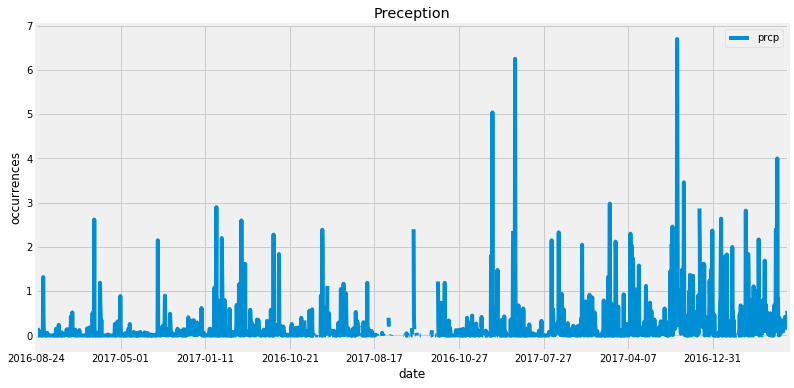

In [17]:
#Plot the results using the DataFrame plot method.
preception_plot = Data_into_pandas.plot(figsize=(12,6))
preception_plot.set_title( 'Preception')
preception_plot.set_ylabel('occurrences')
plt.show()

In [18]:
#-----------------------------------------------Station Analysis----------------------------------------------------#

In [19]:
#Design a query to calculate the total number of stations.

In [20]:
number_of_stations= session.query(Measurement).group_by(Measurement.station).count()
number_of_stations
print(f"There are {number_of_stations} stations in total.")

There are 9 stations in total.


In [21]:
#Design a query to find the most active stations.

In [22]:
#most_active_stations=session.query(Measurement.station).all()
#most_active_stations_pandas= pd.DataFrame(most_active_stations, columns=['station'])
#most_active_stations_pandas.set_index("station", inplace=True)
#most_active_stations_pandas

In [23]:
from sqlalchemy import desc

In [24]:
active_stations= session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
#which station had the highest number of observation?

In [26]:
greatest_observation = 'USC00519281'
greatest_observation

'USC00519281'

In [27]:
Station_observations=session.query(Measurement.tobs).filter(Measurement.date  > "2016-08-23", Measurement.station == greatest_observation).all()

In [28]:
His_graph= pd.DataFrame(Station_observations, columns=['tobs'])
His_graph.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


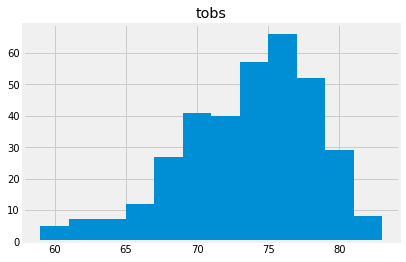

In [29]:
preception=His_graph.hist(bins=12)

In [30]:
session.query(func.max(Measurement.date)).all()

[('2017-08-23')]

In [31]:
engine.execute('SELECT * FROM MEASUREMENT LIMIT 3').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0)]